# Analysis3 - Decoder-ProbeEvaluation_by_blocksize-DPR-TEST

    - Probe evalutaion at blocksize
    - /scratch/philhoon-relevance/decoder-classification/results/NQ-DEV-DPR/5-fold/1/decoder-seq-classifier-layer12-batch128-lr6e-4-combdata-blocksize20

In [64]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import os
from rich.console import Console
from rich.table import Table
from util import utils
import re
from pathlib import Path

In [65]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


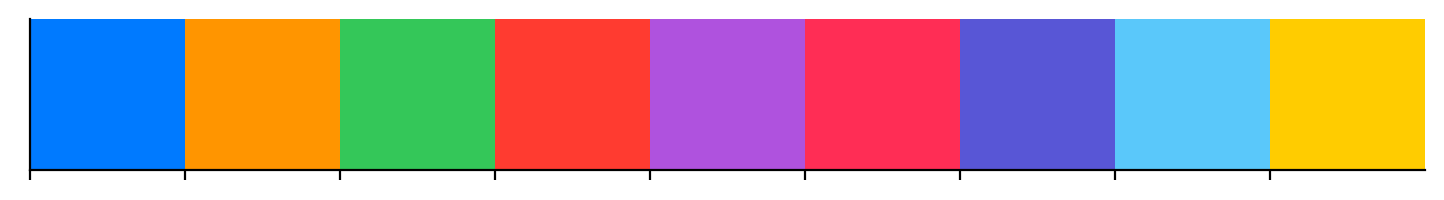

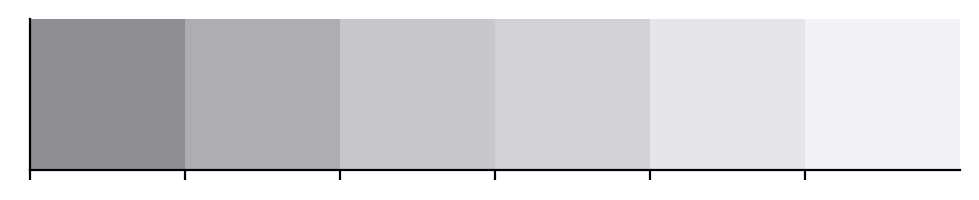

In [66]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [4]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [105]:
initial_path = '/scratch/philhoon-relevance/decoder-classification/results/NQ-DEV-DPR/5-fold/1/'
path = Path(initial_path)
block_size = 60

In [106]:
model_path_lst = path.rglob(f'*blocksize{block_size}')

In [107]:
# infer_lst = []
# for model_path in model_path_lst:
#     inference_path_lst = model_path.rglob(f'*inferencefinished.txt')
#     for inference in inference_path_lst:
#         infer_lst.append(inference)

In [108]:
# infer_lst

In [109]:
cnt = 0
infer_lst = []
for model_path in model_path_lst:
    inference_path_lst = model_path.rglob(f'*inferencefinished.txt')
    for inference in inference_path_lst:
        cnt += 1
        file_path = inference.parent / 'run.log'
        infer_lst.append(file_path)
print(cnt)

76


In [110]:
# infer_lst

In [111]:
# infer_lst

In [112]:
layer_pattern = r"layer(\d+)"
batch_pattern = r"batch(\d+)"
lr_pattern = r"lr([\d.e-]+)"
blocksize_pattern = r"blocksize(\d+)"
step_pattern = r"step_(\d+)"
probe_pattern = r"probe(\d+)"

In [113]:
result = []
for run_log in infer_lst:
    temp = {}
    run_logs_str = str(run_log)
#     print(run_logs_str)
    
    layer_match = re.search(layer_pattern, run_logs_str)
    batch_match = re.search(batch_pattern, run_logs_str)
    lr_match = re.search(lr_pattern, run_logs_str)
    blocksize_match = re.search(blocksize_pattern, run_logs_str)
    step_match = re.search(step_pattern, run_logs_str)
    probe_match = re.search(probe_pattern, run_logs_str)
    
    layer_num = int(layer_match.group(1)) if layer_match else None
    batch_num = int(batch_match.group(1)) if batch_match else None
    lr_num = lr_match.group(1) if lr_match else None
    blocksize_num = int(blocksize_match.group(1)) if blocksize_match else None
    step_num = int(step_match.group(1)) if step_match else None
    probe_num = int(probe_match.group(1)) if probe_match else None
    
    if lr_num and lr_num.endswith('-'):
        lr_num = lr_num[:-1]

#     print("layer:", layer_num)
#     print("batch:", batch_num)
#     print("lr:", lr_num)
#     print("blocksize:", blocksize_num)
#     print("step:", step_num)
#     print("probe:", probe_num)
    
    temp['layer'] = layer_num
    temp['batch'] = batch_num
    temp['lr'] = lr_num
    temp['blocksize'] = blocksize_num
    temp['step'] = step_num
    temp['probe'] = probe_num

    with open(run_log, "r") as f:
        lines = f.readlines()

        last_line = lines[-1]

        em_number_match = re.search(r"EM\s+(\d+\.\d+)", last_line)
        em_number = float(em_number_match.group(1)) if em_number_match else None
        temp['em_number'] = em_number

    result.append(temp)

In [114]:
# result

In [115]:
result_df = pd.DataFrame(result)

In [116]:
result_df

,layer,batch,lr,blocksize,step,probe,em_number
0,24,32,6e-5,60,450,3,53.88
1,24,32,6e-5,60,400,3,53.93
2,24,32,6e-5,60,50,3,51.27
3,24,32,6e-5,60,350,3,53.93
4,24,32,6e-5,60,500,3,54.04
...,...,...,...,...,...,...,...
71,12,32,6e-5,60,100,3,52.38
72,12,32,6e-5,60,50,3,51.97
73,12,32,6e-5,60,350,3,53.85
74,12,32,6e-5,60,500,3,53.77


## Sorting by em_number grouped by probe

In [97]:
for i in range(1, 7):
    result_df_probe = result_df[result_df.probe == i]
    result_df_probe.sort_values(by=['em_number'], ascending=False)
    print(result_df_probe.head)

<bound method NDFrame.head of Empty DataFrame
Columns: [layer, batch, lr, blocksize, step, probe, em_number]
Index: []>
<bound method NDFrame.head of Empty DataFrame
Columns: [layer, batch, lr, blocksize, step, probe, em_number]
Index: []>
<bound method NDFrame.head of     layer  batch    lr  blocksize  step  probe  em_number
0       6     64  6e-5         40   450      3      53.57
1       6     64  6e-5         40   400      3      53.41
2       6     64  6e-5         40   100      3      52.41
3       6     64  6e-5         40    50      3      50.75
4       6     64  6e-5         40   500      3      53.63
..    ...    ...   ...        ...   ...    ...        ...
73     18     64  6e-4         40   250      3      53.38
74     18     64  6e-4         40   200      3      53.63
75     18     64  6e-4         40   300      3      53.35
76     18     64  6e-4         40   150      3      53.49
77     18     64  6e-4         40   550      3      53.21

[78 rows x 7 columns]>
<bound met

In [117]:
result_df_probe3 = result_df[result_df.probe == 3]

In [118]:
result_df_probe3

,layer,batch,lr,blocksize,step,probe,em_number
0,24,32,6e-5,60,450,3,53.88
1,24,32,6e-5,60,400,3,53.93
2,24,32,6e-5,60,50,3,51.27
3,24,32,6e-5,60,350,3,53.93
4,24,32,6e-5,60,500,3,54.04
...,...,...,...,...,...,...,...
71,12,32,6e-5,60,100,3,52.38
72,12,32,6e-5,60,50,3,51.97
73,12,32,6e-5,60,350,3,53.85
74,12,32,6e-5,60,500,3,53.77


In [119]:
result_df_probe3.sort_values(by=['em_number'], ascending=False)

,layer,batch,lr,blocksize,step,probe,em_number
42,12,32,6e-4,60,100,3,54.29
75,12,32,6e-5,60,250,3,54.16
32,6,32,6e-4,60,100,3,54.10
13,6,32,6e-5,60,50,3,54.07
4,24,32,6e-5,60,500,3,54.04
...,...,...,...,...,...,...,...
43,12,32,6e-4,60,50,3,52.38
72,12,32,6e-5,60,50,3,51.97
62,18,32,6e-5,60,100,3,51.88
63,18,32,6e-5,60,50,3,51.69


In [120]:
result_df_probe3_step = result_df_probe3[result_df_probe3.step == 550]

In [121]:
result_df_probe3_step

,layer,batch,lr,blocksize,step,probe,em_number
9,24,32,6e-5,60,550,3,53.96
19,6,32,6e-5,60,550,3,53.88
29,18,32,6e-4,60,550,3,53.30
39,6,32,6e-4,60,550,3,53.35
49,12,32,6e-4,60,550,3,53.38
59,24,32,6e-4,60,550,3,53.82
69,18,32,6e-5,60,550,3,53.82


In [103]:
# result_df_probe3

<AxesSubplot:xlabel='step', ylabel='em_number'>

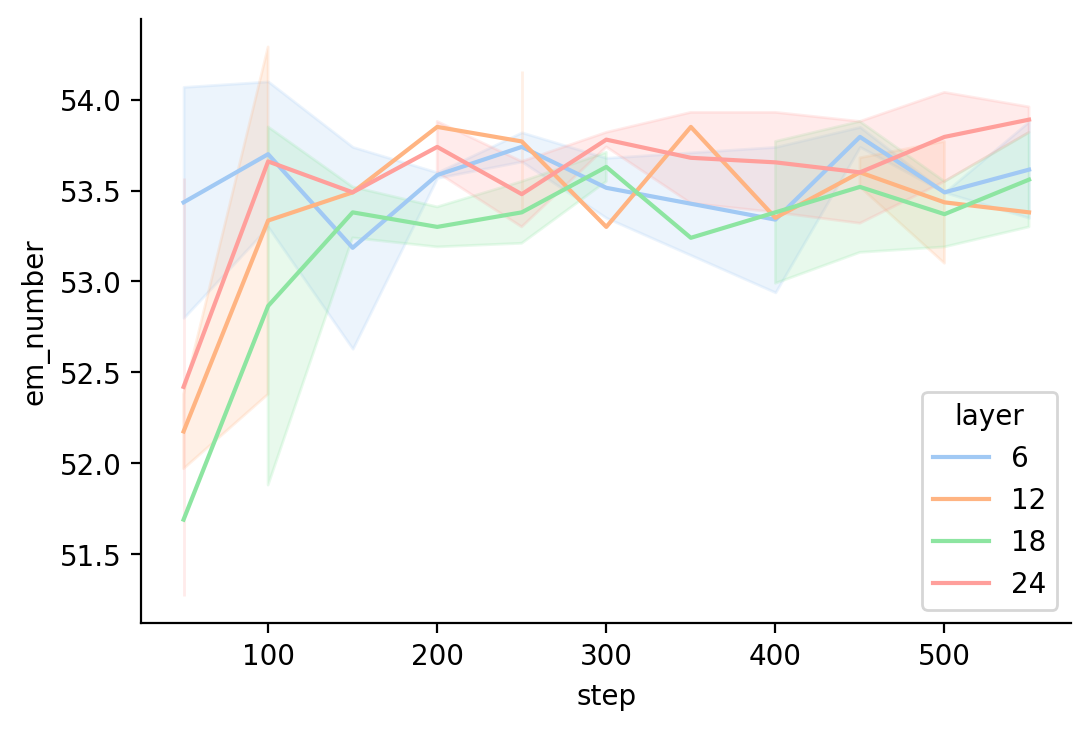

In [122]:
sns.lineplot(x='step', y='em_number', hue='layer', data = result_df_probe3, palette = 'pastel')

In [22]:
result_df_p3_12 = result_df[(result_df['probe'] == 3) & (result_df['layer'] == 12)]

In [23]:
result_df_p3_12

,layer,batch,lr,blocksize,step,probe,em_number
38,12,64,6e-5,40,450,3,53.57
39,12,64,6e-5,40,400,3,53.63
40,12,64,6e-5,40,100,3,53.07
41,12,64,6e-5,40,350,3,53.43
42,12,64,6e-5,40,500,3,53.55
43,12,64,6e-5,40,250,3,53.32
44,12,64,6e-5,40,200,3,53.38
45,12,64,6e-5,40,300,3,53.38
46,12,64,6e-5,40,150,3,52.74
47,12,64,6e-5,40,550,3,53.52


In [25]:
def get_plot(df):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-25-5d07e7931585>, line 2)

In [24]:
get_plot(result_df_p3_24)

NameError: name 'get_plot' is not defined